I have run the same experiment (training an AC) several times, to investigate the role of initialization. Each model is initialized differently. The data is also shuffled differently in every run, so this experiment is not that qualitative. It still shows how much of an impact initialization has on this model.

The AC is placed on branch 11 of the ASR model. You can find the experiment config in `logs/ac/train/binary/b11/version_0/hparams.yaml`.

In PyTorch, linear layers are initialized with a uniform distribution, as stated [here](https://discuss.pytorch.org/t/how-are-layer-weights-and-biases-initialized-by-default/13073):

```python
stdv = 1. / math.sqrt(self.weight.size(1))
self.weight.data.uniform_(-stdv, stdv)
if self.bias is not None:
    self.bias.data.uniform_(-stdv, stdv)
```

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from scipy import interpolate

In [2]:
folder = "../../../logs/ac/train/binary/b11"
dataframes = dict()
for f in listdir(folder):
    dataframes[f] = {
        "train": pd.read_pickle(f"{folder}/{f}/dataframes/train.pkl"),
        "val": pd.read_pickle(f"{folder}/{f}/dataframes/val.pkl")
    }

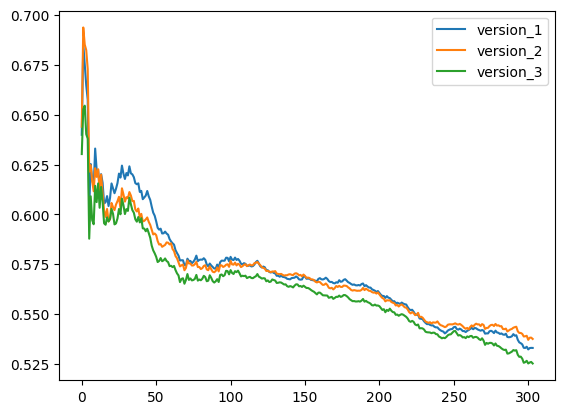

In [3]:
for exp, df in dataframes.items():
    plt.plot(df["train"]["AC Loss"].head(304).rolling(200, min_periods=1).mean(), label=exp)
    plt.legend()

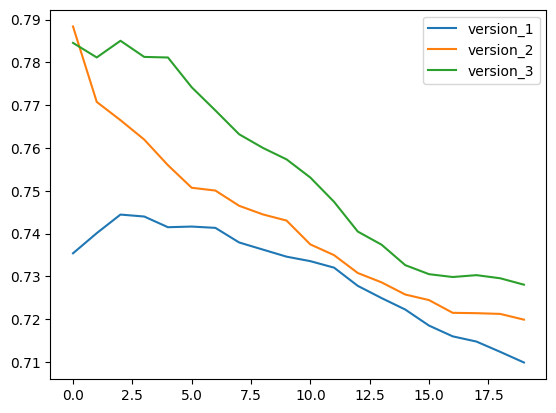

In [4]:
for exp, df in dataframes.items():
    plt.plot(df["val"]["val_ac_loss per correct accent_avg (unweighted)"].head(20).rolling(10, min_periods=1).mean(), label=exp)
    plt.legend()

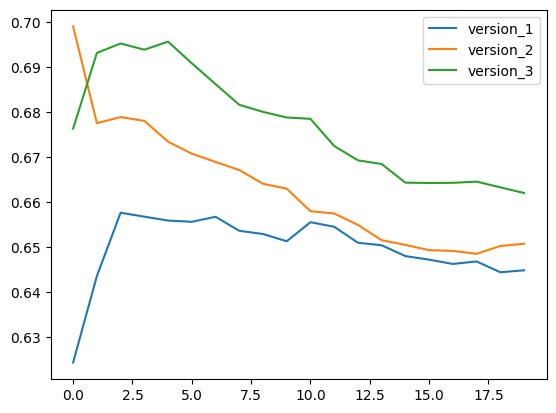

In [5]:
for exp, df in dataframes.items():
    plt.plot(df["val"]["F1-score_avg"].head(20).rolling(10, min_periods=1).mean(), label=exp)
    plt.legend()

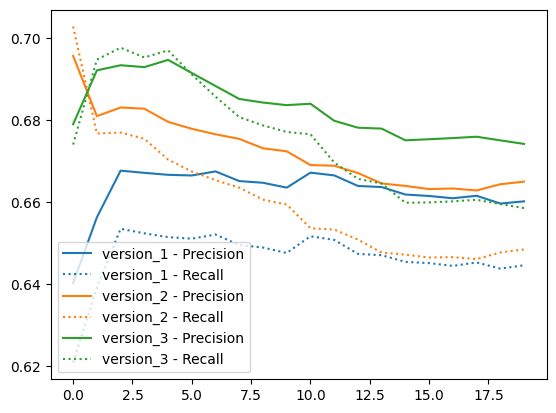

In [6]:
for exp, df in dataframes.items():
    p = plt.plot(df["val"]["Precision_avg"].head(20).rolling(10, min_periods=1).mean(), label=f"{exp} - Precision")
    plt.plot(df["val"]["Recall_avg"].head(20).rolling(10, min_periods=1).mean(), 
        color=p[0].get_color(), linestyle="dotted", label=f"{exp} - Recall")
    plt.legend()

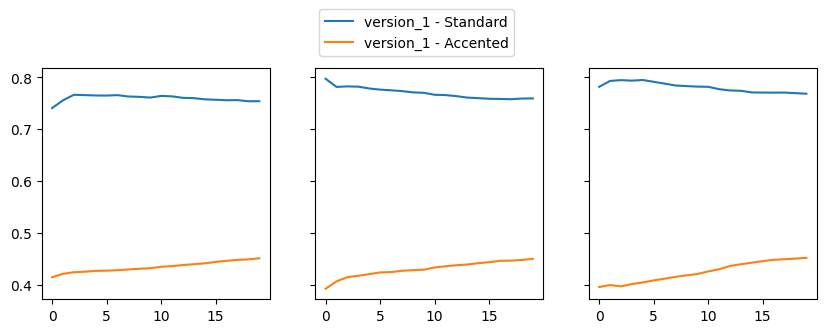

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(10, 3))
for i, (exp, df) in enumerate(dataframes.items()):
    for acc in ["Standard", "Accented"]:
        axes[i].plot(df["val"][f"F1-score_{acc}"].head(20).rolling(10, min_periods=1).mean(), label=f"{exp} - {acc}")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.1))

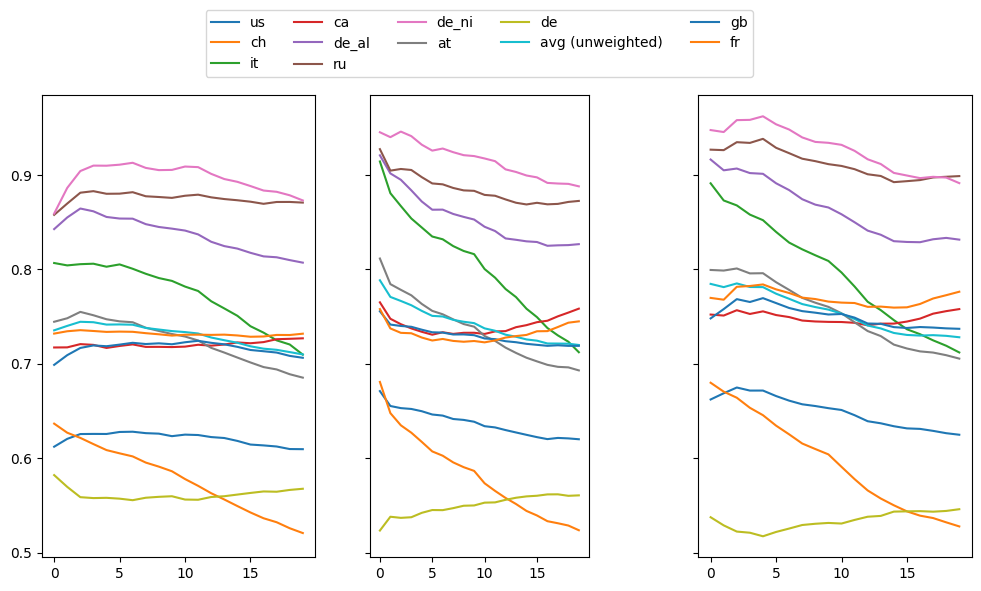

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 6))
for i, (exp, df) in enumerate(dataframes.items()):
    for col in df["val"].columns:
        if "val_ac_loss per" in col:
            axes[i].plot(df["val"][col].head(20).rolling(10, min_periods=1).mean(), label=col[31:])

box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=5)
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')